<a href="https://colab.research.google.com/github/padilhalucas/covid-incidence/blob/main/Covid_19_Incid%C3%AAncia_do_v%C3%ADrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid-19: Análise de incidência do vírus**

A análise é totalmente independente e com o único objetivo de manipular  bibliotecas simples e úteis do Python.

**Introdução ao Pandas, Matplotlib e Mapas interativos**

Com base em vídeos e conteúdos da internet foi possível explorar em algumas linhas de código o potencial das bibliotecas.


In [ ]:
#importando biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#lendo arquivo csv 
df = pd.read_csv("/content/CV_LatLon_21Jan_12Mar.csv")

In [ ]:
#visualizando disposição dos dados
df.head()

,Unnamed: 0,state,country,lat,lon,date,confirmed,recovered,death
0,0,0,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,1,0,Japan,36.0000,138.0000,1/22/20,2,0,0
2,2,0,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,3,0,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,4,0,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [ ]:
#qtd de linhas e colunas
df.shape

(20706, 9)

In [ ]:
#colunas do dataset
df.columns

Index(['Unnamed: 0', 'state', 'country', 'lat', 'lon', 'date', 'confirmed',
       'recovered', 'death'],
      dtype='object')

In [ ]:
print("O número máximo de confirmados é: " + str(df.confirmed.max()))

O número máximo de confirmados é: 67781


In [ ]:
#retirando linhas que não contém casos confirmados
df_all = df
df= df[df['confirmed'] != 0]

In [ ]:
#ordenando valores por casos confirmados
df = df.sort_values('confirmed')
df

,Unnamed: 0,state,country,lat,lon,date,confirmed,recovered,death
20705,20705,0,Guyana,5.0000,-58.7500,3/12/20,1,0,1
16039,16039,Tibet,China,31.6927,88.0924,3/1/20,1,1,0
16139,16139,"Providence County, RI",US,41.8882,-71.4774,3/1/20,1,0,0
16159,16159,"Suffolk County, MA",US,42.3601,-71.0589,3/1/20,1,1,0
16166,16166,"Orange County, CA",US,33.7879,-117.8531,3/1/20,1,0,0
...,...,...,...,...,...,...,...,...,...
18832,18832,Hubei,China,30.9756,112.2707,3/8/20,67707,45235,2986
19238,19238,Hubei,China,30.9756,112.2707,3/9/20,67743,46488,3008
19644,19644,Hubei,China,30.9756,112.2707,3/10/20,67760,47743,3024
20050,20050,Hubei,China,30.9756,112.2707,3/11/20,67773,49134,3046


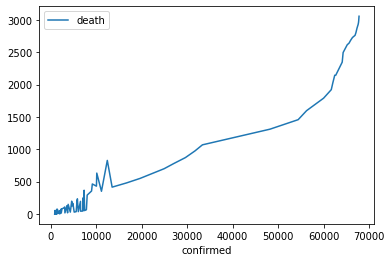

In [ ]:
#curva de confirmadosXmortes com alguns dados
df_short = df.sort_values('confirmed',ascending=False).head(300)
df_short.plot('confirmed','death')

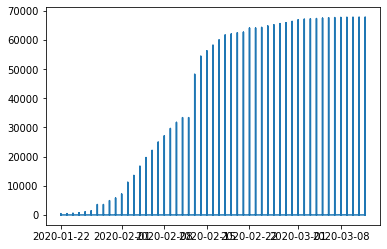

In [ ]:
df_all['date'] = pd.to_datetime(df_all.date)
df_all = df_all.sort_values('date')
plt.plot(df_all.date,df_all.confirmed)


In [ ]:
#importando biblioteca de visualização de mapas
!pip install folium
import folium as fl
from folium.plugins import HeatMap

In [ ]:
#plotando mapa de temperatura (sem considerar qtd de infecção na região, mas sim a incidência)
m = fl.Map(
    location=[-5.7793, -35.2009],
    zoom_start=11
)
lat = df.lat.to_list()
lon = df.lon.to_list()

HeatMap(list(zip(lat,lon))).add_to(m)
m